Name: Tien-Ching Hsieh  
Github Username: hsieh2000  
USC ID: 2642366337  


In [1]:
import numpy as np
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import math
import random

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler



## 1(a)

concatenate data

In [2]:
df = pd.DataFrame()
# for i in range(1,6):
#     df = pd.concat([df, pd.read_excel("../CCPP/Folds5x2_pp.xlsx", sheet_name = f"Sheet{i}")], ignore_index=True)

df = pd.concat([df, pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx", sheet_name = f"Sheet1")], ignore_index=True)

## 1(b)

### i

observe data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


The entire dataset has 9568 rows and 5 columns.  
Column 'AT' represents 'Temperature'.
Column 'AP' represents 'Ambient Pressure'.
Column 'RH' represents 'Relative Humidity'.
Column 'V' represents 'Exhaust Vacuum'.
Column 'PE' represents 'Net hourly electrical energy output'.

Each row represents a data point, which is also called observation, example, instance, sample, and pattern.  
For columns AT, V, AP, RH, each one represents an input variable, which is called attributes, predictors, features, also known as an independent variable.  
And for the last column PE, it is the output variable of the model, also called dependent variable, response, target, output.

### ii

/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/jeremyhsieh/Documents/USC Course/DSCI 552/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `

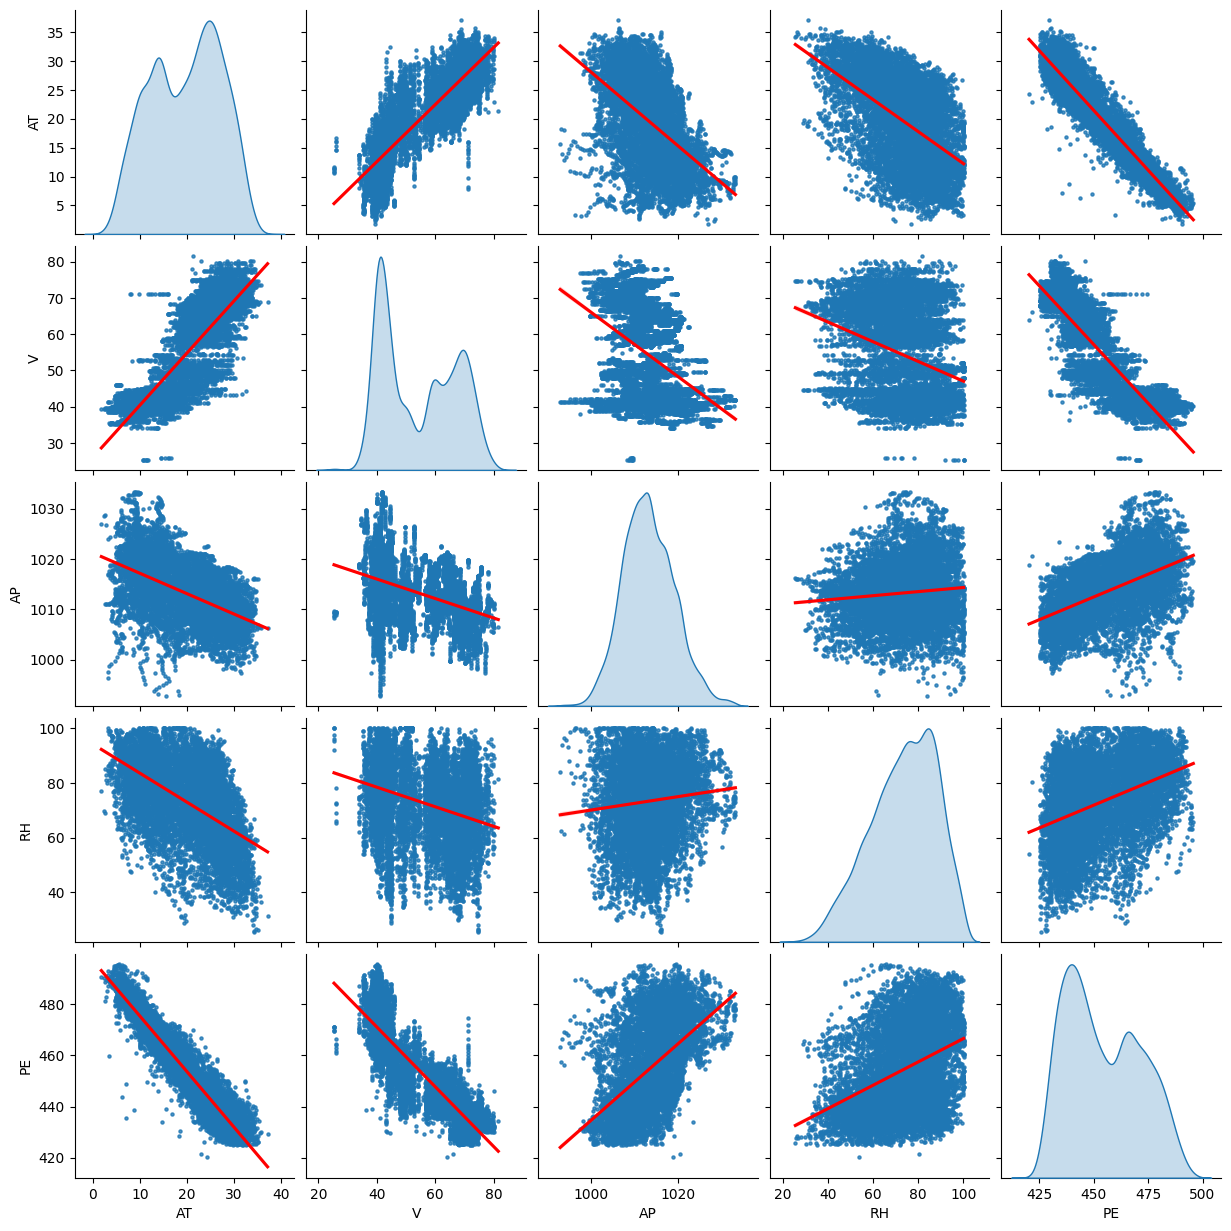

In [6]:
pair_plot = sns.pairplot(df, diag_kind="kde", kind="reg", 
                         palette=sns.color_palette("Set2"),
                         plot_kws={'line_kws':{'color': 'red'}, 
                                   'scatter_kws': {'s': 5}})

plt.show()

Finds Out:  
- The scatter plots show that [AT, PE] and [V, PE] have strong linear relationship.  
- PE tends to be large when AT decreases, so does [V, PE]. However, there are several weird data points in [V, PE], these data points layout look like horizantal lines, reveals at [V = 70, PE = 450 ~ 480], and [V < 30, PE = 460 ~ 470].  
- For the AP-PE scatter plot, linear relationship seems existed. When AP increase, PE will also increase. However, the shape of scatter plot looks like a funnel, which might imply the exist of Non-constant Variance of Error Terms.
- Lastly, I can barely describe the linear relationship between RH and PE. I can only say that as RH becomes smaller and smaller, the possibility of obtaining a relatively high PE decreases.   
In conclusion, it appears that all four predictors have a certain level of linear relationship with PE.

### iii

In [7]:
df_stats = df.describe().T
df_stats = df_stats.assign(range= lambda x: x["max"] - x["min"],
interquartile_range= lambda x: x["75%"] - x["25%"])
df_stats.rename(columns={"50%": "median", "25%": "first_quartile", "75%": "third_quartiles"}, inplace=True)
df_stats = df_stats.iloc[:, [1, 5, 4, 6, 8, 9]].T
df_stats

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
first_quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
third_quartiles,25.720000,66.540000,1017.260000,84.830000,468.430000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile_range,12.210000,24.800000,8.160000,21.502500,28.680000


## 1(C)

In [8]:
X, y= df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()

In [9]:
# model = LinearRegression().fit(X_train, y_train)

# print(f"model.score: {model.score(X_train, y_train)}")
# print(f"model.coef_: {model.coef_}")
# print(f"model.intercept_: {model.intercept_}")

# y_predict = model.predict(X_train)
# mse = mean_squared_error(y_train, y_predict)
# mse

In [10]:
univar_coefficient_lst = []
Q_1C_y_training_predict_lst = []

for i in range(0, X.shape[1]):
    _X_train = sm.add_constant(X[:, i])
    model = sm.OLS( y, _X_train)
    response = model.fit()
    univar_coefficient_lst.append(response.params[1])
    print(f"\nPredictor: {df.columns[i]}")
    print(response.summary())
    print(f"P-value: {response.pvalues}")
    print("-"*80)
    print(f"{_X_train.shape}\n")

    Q_1C_y_training_predict_lst.append(response.predict(_X_train))
    


Predictor: AT
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:07:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   31

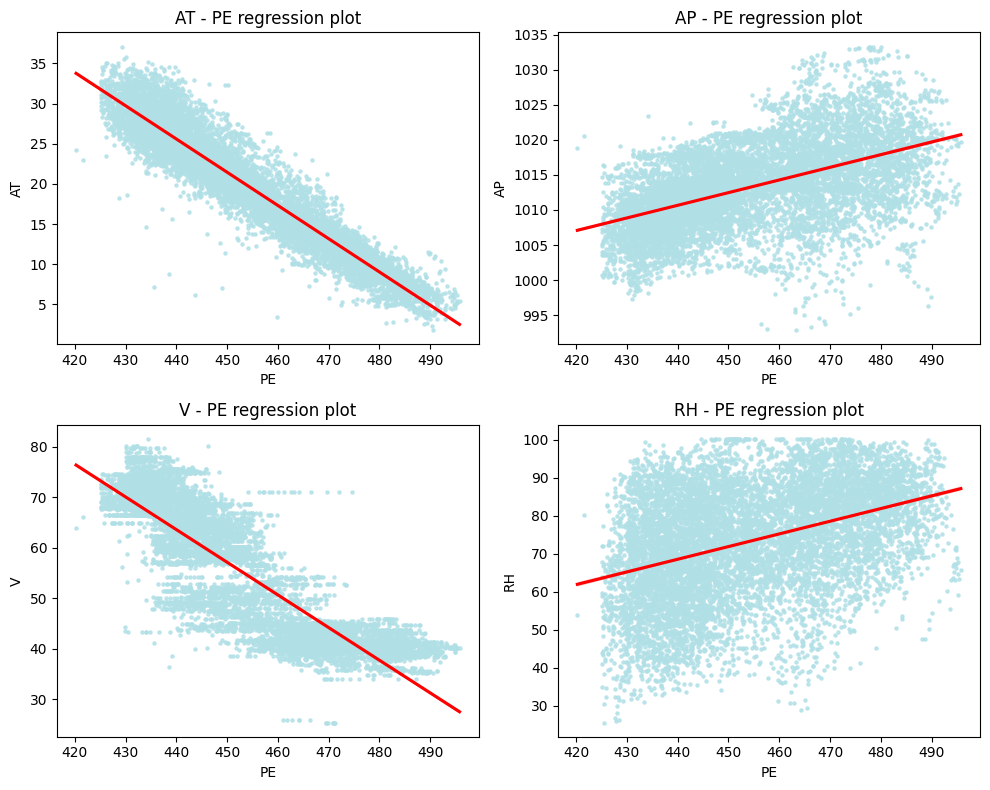

In [11]:
scatter_color = "powderblue"
line_color = "red"

figure, axis = plt.subplots(2, 2, figsize=(10, 8))
for i in range(0, len(df.columns)-1):
    x, _y = i % 2, i // 2
    sns.regplot(data=df, y=df.columns[i], x=df.columns[-1], scatter_kws={"color": scatter_color, 's':5},line_kws={"color": line_color}, ax=axis[x, _y], ci=95)
    axis[x, _y].set_xlabel(df.columns[-1])
    axis[x, _y].set_ylabel(df.columns[i])
    axis[x, _y].set_title(f'{df.columns[i]} - {df.columns[-1]} regression plot')

plt.tight_layout()
plt.show()

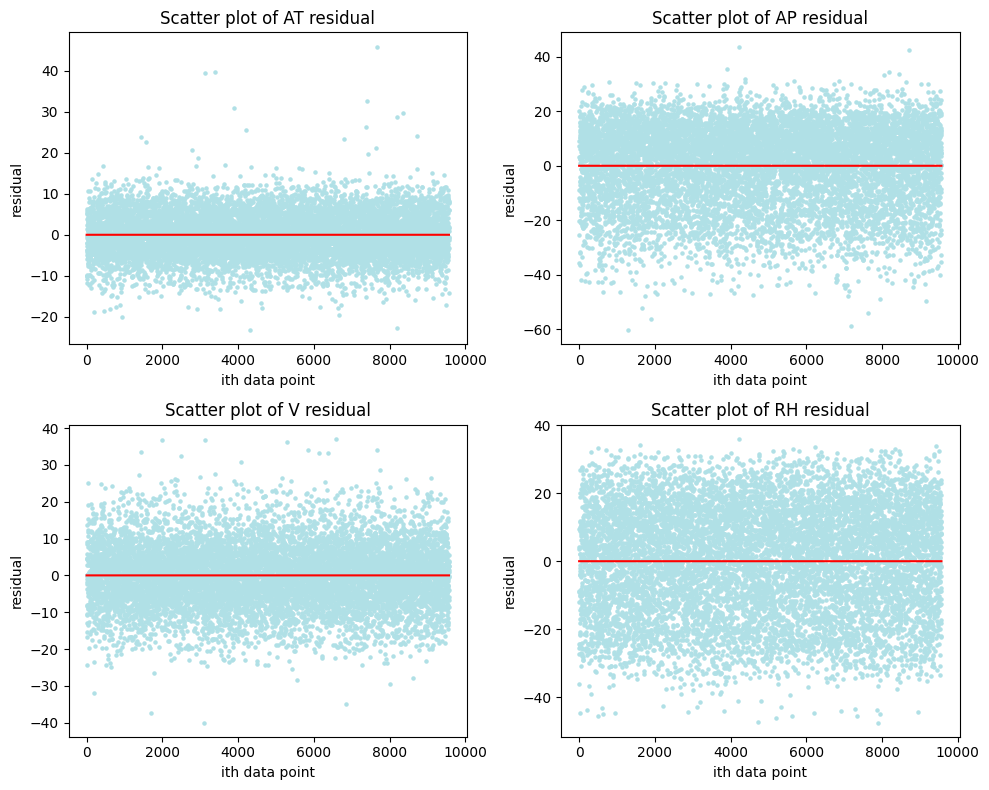

In [12]:
figure, axis = plt.subplots(2, 2, figsize=(10, 8))
for i in range(len(Q_1C_y_training_predict_lst)):
    x, _y = i % 2, i // 2
    residuals = Q_1C_y_training_predict_lst[i] - y
    axis[x, _y].scatter(range(0, y.shape[0]), residuals, s=5, color = 'powderblue')
    axis[x, _y].plot(range(0, y.shape[0]), [0 for i in range(0, y.shape[0])], color="red")
    axis[x, _y].set_xlabel("ith data point")
    axis[x, _y].set_ylabel("residual")
    axis[x, _y].set_title(f"Scatter plot of {df.columns[i]} residual")

plt.tight_layout()
plt.show()


According to regression plot, it's clear that the trend of data distribution matches the result of our simple linear regression model.  
Taking look at the residual of each predictors, the variances of each result mostly follows the linear regression assumption that variance should be a constant. However, we can discover that the residual of AP is imbalance, which might imply the exist of outliers.

In [13]:
print("Outlier Format: (index, value)\n")
for i in range(0, 4):
    print(f"Predictor: {df_stats.columns[i]}")
    # another common used way to decide outlier, rule of thumb
    # print(df_stats.iloc[2, i] - 1.5*df_stats.iloc[-1, i])
    # print(df_stats.iloc[3, i] + 1.5*df_stats.iloc[-1, i])
    outlier_ind = np.where(stats.zscore(X[:, i]) >= 3)[0]
    
    print(f"{[(int(x), int(y)) for x, y in zip(outlier_ind, X[:, i][outlier_ind])]}\n")

Outlier Format: (index, value)

Predictor: AT
[]

Predictor: V
[]

Predictor: AP
[(319, 1033), (536, 1031), (669, 1033), (715, 1033), (753, 1032), (810, 1033), (1250, 1031), (1660, 1031), (2298, 1031), (2481, 1032), (2579, 1032), (2761, 1031), (3015, 1033), (3021, 1031), (3213, 1032), (3412, 1032), (3483, 1033), (3796, 1031), (3955, 1032), (4125, 1033), (4327, 1032), (5431, 1032), (5529, 1031), (5690, 1032), (5840, 1031), (5928, 1032), (5956, 1032), (6006, 1032), (6346, 1031), (7186, 1031), (7320, 1031), (7485, 1031), (7807, 1031), (7892, 1033), (8098, 1031), (8104, 1031), (8270, 1031), (8462, 1031), (8568, 1031), (9159, 1031), (9267, 1031), (9342, 1031)]

Predictor: RH
[]



The summary of models matches the observation in 1(a), R-squared from high to low is [AT > V >> AP > RH].
However, not a single predictor's p-value is statistically insignificant, all p-values are smaller than 0.05.


## 1(d) 

In [14]:
_X_train = sm.add_constant(X)
model = sm.OLS(y, _X_train)
response = model.fit()
multivar_coefficient_lst = response.params[1:]

print(f"\nPredictor: {list(df.columns)[:-1]}")
print(response.summary())
print("-"*80)
print(f"P-value: {response.pvalues}")
print(f"{_X_train.shape}\n")



Predictor: ['AT', 'V', 'AP', 'RH']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:07:29   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454

According to the OLS Regression Result, all 4 predictors are statistically significant, which means that each predictor can reject the null hypothesis.  
And the R-squared of the multiple regression model is actually higher than any univariate regression model as well.  
However, I notice the summary mentioned that the model might exist multicollinearity, so I check the Pearson Correlation matrix first to understand the correlation between each predictor and another. Then, I use VIF to verify that a severe mutilinearity indeed exists in the model.  
I find out that after removing high VIF predictors, the r-squared of the model drops a litte bit, and the t-score of remaining predictors become more significant. So, maybe these high VIF predictors still carry some useful information to the model.

Pearson Correlation

In [15]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


VIF

In [16]:
_cols = [0, 1, 2, 3]
while True:
    _df = df.iloc[:, _cols]

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = _df.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(_df.values, i) for i in range(len(_df.columns))]

    print(f"{vif_data}\n")

    if vif_data["VIF"].max() <= 5:
        break
    else:
        # delete the feature having the highest VIF, because the highest VIF means that it's the most redundant variable
        _cols.pop(vif_data["VIF"].idxmax())

  feature        VIF
0      AT  39.157705
1       V  74.969127
2      AP  66.618618
3      RH  40.704756

  feature        VIF
0      AT  10.821373
1      AP  64.595152
2      RH  36.414049

  feature       VIF
0      AT  4.413538
1      RH  4.413538



Regression Model Removing High VIF Predictor

In [17]:
_X_train_VIF = sm.add_constant(X[:, [0, 3]])
model = sm.OLS( y, _X_train_VIF)
response = model.fit()

print(f"\nPredictor: {list(df.columns)[0]},  {list(df.columns)[3]}")
print(response.summary())
print("-"*80)
print(f"{_X_train_VIF.shape}\n")



Predictor: AT,  RH
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 5.572e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:07:29   Log-Likelihood:                -28582.
No. Observations:                9568   AIC:                         5.717e+04
Df Residuals:                    9565   BIC:                         5.719e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        516.4765      0.401

## 1(e)

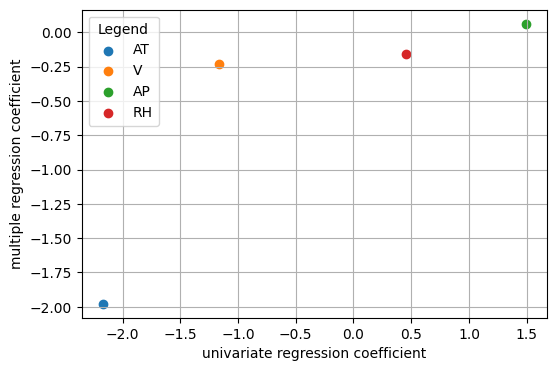

In [18]:
colors = ['red', 'blue', 'green', 'purple']
labels = ['AT', 'V', 'AP', 'RH']

plt.figure(figsize=(6, 4))

for i in range(4):
    plt.scatter(univar_coefficient_lst[i], multivar_coefficient_lst[i], 
                color=list(mcolors.TABLEAU_COLORS.values())[i], label=labels[i]) 

plt.ylabel("multiple regression coefficient")
plt.xlabel("univariate regression coefficient")
plt.legend(title="Legend")
plt.grid()
plt.show()


## 1(f)

In [19]:
response_lst = []
for i in range(0, 4):
    
    _X_train = X[:, i]
    poly_features = PolynomialFeatures(degree=3)
    _X_train = poly_features.fit_transform(_X_train.reshape(-1, 1))
    model = sm.OLS(y, _X_train)
    response_lst.append(model.fit())

for res_ind in range(0, len(response_lst)):
    _col_name = ['Intercept']
    for i in [1,2,3]:
        _col_name.append(f"{df.columns[res_ind]}**{str(i)}")
    print(response_lst[res_ind].summary(xname=_col_name, yname=df.columns[-1]))


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:07:29   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

AT has significant nonlinearity, since r-squared inceases and all predictors are statistically significant.  
V has no nonlinearity. Though r-squared inceases, V^2 and V^3 are statistically insignificant.  
AP has nonliniarity, all predictors are statistically significant.  
RH has nonliniarity, all predictors are statistically significant.  

## 1(g)

In [20]:
labels = {
    0: 'AT',
    1: 'V',
    2: 'AP',
    3: 'RH'
} 

# Combination = []
# for i in range(2, 5):
#     Combination.extend(combinations(labels.keys(), i))

Combination = list(combinations(labels.keys(), 2))
Combination_col = [
    tuple(labels[i] for i in comb) for comb in Combination
]

all_cols = ["Intercept", "AT", "V", "AP", "RH"]
all_cols.extend([" x ".join(comb) for comb in Combination_col])

print(Combination)
print(all_cols)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
['Intercept', 'AT', 'V', 'AP', 'RH', 'AT x V', 'AT x AP', 'AT x RH', 'V x AP', 'V x RH', 'AP x RH']


In [21]:
interaction_arr = []
for i in Combination:
    ans = 1
    print(i)
    for j in i:
        ans =  ans * X[:, j]
    print(ans)
    interaction_arr.append(ans)

_X_train = np.concatenate((X, np.array(interaction_arr).T), axis=1)
_X_train = sm.add_constant(_X_train)
_df_X_train = pd.DataFrame(_X_train,columns=all_cols)
model = sm.OLS(y, _df_X_train)
response = model.fit()
print(response.summary())
print("-"*80)
print(f"{_X_train.shape}\n")


(0, 1)
[ 624.7296 1585.3328  201.334  ... 2328.0156 1700.136  1350.432 ]
(0, 2)
[15320.0872 25684.6072  5172.1376 ... 31724.6544 24819.2928 21972.168 ]
(0, 3)
[1094.6232 1487.6344  470.8354 ... 1142.5536 1527.3072 1465.992 ]
(1, 2)
[42765.1632 64221.7184 39879.104  ... 75290.3436 70412.577  63597.2196]
(1, 3)
[3055.5792 3719.6768 3630.316  ... 2711.5584 4332.9855 4243.2324]
(2, 3)
[74931.2019 60263.9632 93260.4224 ... 36951.3216 63254.7254 69039.4001]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:07:30   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5

This is a really confused situation, just like what professor said in lecture. Some interactions show statistical significance, but one of the element composed the interaction is insignificant, like (AT x V) & AT.  
And the R-squared of the model actually inceases.


## 1(h)

In [22]:
print(f"Predictors which p-value is lower than 0.05 in question 1(g):\n{list(response.pvalues[response.pvalues < 0.05].index)[:]}")
pair_dict = {i: all_cols[:][i] for i in range(len(all_cols[:]))}
print(pair_dict)
print("\nStatsistical Significant Predictors")
print(f"Including {list(response.pvalues[response.pvalues < 0.05].index)[1:]} and insignificant predictors AT.")
# _X_train = _X_train[:, [1, 2, 3, 4, 5, 7, 8, 10]]
print(f"Predictors and interactions of training dataset for 1(h) the second model:\n{[pair_dict.get(i) for i in [1, 2, 3, 4, 5, 7, 8, 10]]}")
# print(_X_train.shape)


Predictors which p-value is lower than 0.05 in question 1(g):
['Intercept', 'V', 'AP', 'RH', 'AT x V', 'AT x RH', 'V x AP', 'AP x RH']
{0: 'Intercept', 1: 'AT', 2: 'V', 3: 'AP', 4: 'RH', 5: 'AT x V', 6: 'AT x AP', 7: 'AT x RH', 8: 'V x AP', 9: 'V x RH', 10: 'AP x RH'}

Statsistical Significant Predictors
Including ['V', 'AP', 'RH', 'AT x V', 'AT x RH', 'V x AP', 'AP x RH'] and insignificant predictors AT.
Predictors and interactions of training dataset for 1(h) the second model:
['AT', 'V', 'AP', 'RH', 'AT x V', 'AT x RH', 'V x AP', 'AP x RH']


In [23]:
# X_train, y_train = df.iloc[:int(len(df)*0.7), :-1].to_numpy(), df.iloc[:int(len(df)*0.7), -1].to_numpy()
# X_test, y_test = df.iloc[int(len(df)*0.7):, :-1].to_numpy(), df.iloc[int(len(df)*0.7):, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
df_h_training = pd.DataFrame(np.concatenate((X_train, y_train.reshape(-1, 1)), axis = 1), columns=df.columns)
df_h_test_X = pd.DataFrame(X_test, columns=df.columns[:-1])
df_h_test_y = pd.DataFrame(y_test, columns=[df.columns[-1]])

In [25]:
formula = "PE ~ AT + V + AP + RH"
model = smf.ols(formula, df_h_training)
response = model.fit()
print("Baseline Regression Model\n")
print(response.summary())

y_predict_training = response.predict(df_h_training.iloc[:, :-1])
y_predict_test = response.predict(df_h_test_X)

train_mse = mean_squared_error(df_h_training.iloc[:, -1], y_predict_training)
test_mse = mean_squared_error(df_h_test_y, y_predict_test)

print(f"Training mse: {train_mse}")
print(f"Test mse: {test_mse}")

Baseline Regression Model

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:07:30   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.5613    

In [26]:
print("Regression Model with All Possible Interaction Terms and Quadratic Nonlinearities\n")
formula = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH + V*AP + AP*RH'
model = smf.ols(formula, df_h_training)
response = model.fit()
print(response.summary())

y_predict_training = response.predict(df_h_training.iloc[:, :-1])
y_predict_test = response.predict(df_h_test_X)

train_mse = mean_squared_error(df_h_training.iloc[:, -1], y_predict_training)
test_mse = mean_squared_error(df_h_test_y, y_predict_test)

print(f"Training mse: {train_mse}")
print(f"Test mse: {test_mse}")


Regression Model with All Possible Interaction Terms and Quadratic Nonlinearities

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9007.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:07:30   Log-Likelihood:                -19249.
No. Observations:                6697   AIC:                         3.852e+04
Df Residuals:                    6685   BIC:                         3.860e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

The test R-squared and mse of Regression Model with All Possible Interaction Terms and Quadratic Nonlinearities are better than Baseline Regression Model's.


## 1(i)

In [27]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

train_standardized_err = []
test_standardized_err = []
train_err = []
test_err = []

for i in range(1, 101):

    KNN_regression_standardized = KNeighborsRegressor(n_neighbors=i)
    KNN_regression_standardized.fit(X_train_standardized, y_train)

    y_predict_tran = KNN_regression_standardized.predict(X_train_standardized)
    y_predict_test = KNN_regression_standardized.predict(X_test_standardized)
    train_standardized_err.append(mean_squared_error(y_train, y_predict_tran))
    test_standardized_err.append(mean_squared_error(y_test, y_predict_test))


    KNN_regression = KNeighborsRegressor(n_neighbors=i)
    KNN_regression.fit(X_train, y_train)

    y_predict_tran = KNN_regression.predict(X_train)
    y_predict_test = KNN_regression.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_predict_tran))
    test_err.append(mean_squared_error(y_test, y_predict_test))



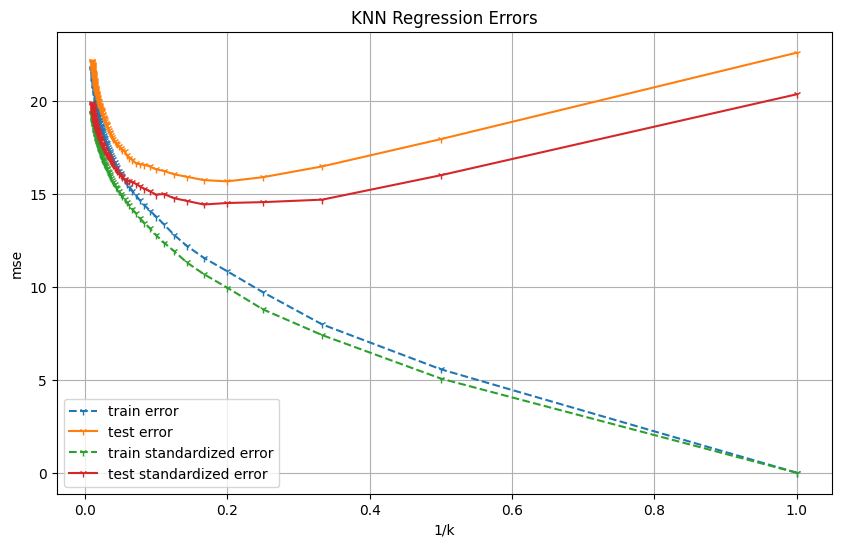

In [28]:
k = 1/np.array(range(1, 101))

plt.figure(figsize=(10, 6))
plt.plot(k, train_err, label="train error", marker="1",linestyle="dashed")
plt.plot(k, test_err, label="test error", marker="1")
plt.plot(k, train_standardized_err, label="train standardized error", marker="1", linestyle="dashed")
plt.plot(k, test_standardized_err, label="test standardized error", marker="1")
plt.xlabel("1/k")
plt.ylabel("mse")
plt.title("KNN Regression Errors")
plt.legend()
plt.grid()
# plt.gca().invert_xaxis()
plt.show()

In [29]:
print(f"min test_err: {min(test_err)}, best K = {test_err.index(min(test_err))}")
print(f"min test_standardized_err: {min(test_standardized_err)}, best K = {test_standardized_err.index(min(test_standardized_err))}")


min test_err: 15.6635051689307, best K = 4
min test_standardized_err: 14.419305639730645, best K = 5


## 1(j)

The minimum test mse of linear regression is 17.532698949982855 (Regression Model with All Possible Interaction Terms and Quadratic Nonlinearities)  
The minimum test mse of KNN regression is 14.419305639730645 (standardized), where k equals to 5.  

The reason why KNN regression has better mse probably relate to data distribution. Linear regression is able to provide a good performance based on the assumption that the data distribution is linear. Even if we apply Interaction Terms and Quadratic Nonlinearities, the regression line still follows the pattern of the regression formula. On the other hand, KNN regression doesn't base on any assumption, no matter the data distribution is linear or non-linear, it will only condiders the nearest k data points around the input, so it can generate much more flexible curve. In conclusion, the data distribution might be more complex than a linear relationship, so that KNN regression has lower mse. By the way, we also can see that standardized data in KNN regression gives us better mse than original data.


# 2  
### (a)
<b>The sample size n is extremely large, and the number of predictors p is small.</b>  
  
Ans: A flexible method performs better than an inflexible method.  
Because when n is large, the estimate will be more stable. For a small number of predictors, flexible methods are competent to fit an effective model better than inflexible methods,and also prevent the problem of overfitting.
  
  
### (b)
<b>The number of predictors p is extremely large, and the number of observations n is small.</b>  
  
Ans: An inflexible method performs better than a flexible method.  
This situation is called the curse of dimensionality, flexible methods will suffer from it, which undermines the reliability of the models due to the increase of computational complexity, overfitting, and spurious correlations.

  
### (c)
<b>The relationship between the predictors and response is highly non-linear.</b>  
  
Ans: A flexible method performs better than an inflexible method.  
In this case, the relationship between predictors and response is too complicate for inflexible methods to capture. Because inflexible methods are too simple to learn the pattern of data, which is also known as high bias. Flexible methods perform better because they don't build the model based-on any assumption about the underlying distribution of data, making them more efficient and robust in capturing non-linear relationships in the data.

### (d)
<b>The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.</b>  

Ans: An inflexible method performs better than a flexible method .  
High variance means that the distribution of data is dispersed, when fitting flexible methods with this kind of data, the models will easily learn too much noise from training data, leading overtfitting. Instead, inflexible methods can't capture such complicated pattern, so the decision boundary of the models will not be overly sensitive to noise, making better performance for high variance data.

ref:  
The importance of having Large Sample Sizes for your research: https://www.cwauthors.com/article/importance-of-having-large-sample-sizes-for-research  
law of large numbers: https://en.wikipedia.org/wiki/Law_of_large_numbers  
What are flexible statistical learning methods?:  https://www.quora.com/What-are-flexible-statistical-learning-methods  
Parametric vs Non-Parametric Statistical Learning Methods: https://medium.com/our-internship-journey/parametric-vs-non-parametric-statistical-learning-methods-a03f45431619  
Machine Learning: Flexible and Inflexible Models: https://www.baeldung.com/cs/ml-flexible-and-inflexible-models  
Does SVM suffer from curse of high dimensionality? If no, Why?: https://stats.stackexchange.com/questions/484289/does-svm-suffer-from-curse-of-high-dimensionality-if-no-why  
Curse of Dimensionality in Machine Learning: https://www.geeksforgeeks.org/curse-of-dimensionality-in-machine-learning/  
SVM, Overfitting, curse of dimensionality: https://stats.stackexchange.com/questions/35276/svm-overfitting-curse-of-dimensionality  
Does Dimensionality curse effect some models more than others?: https://stats.stackexchange.com/questions/186184/does-dimensionality-curse-effect-some-models-more-than-others  


# 3  
<b>Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.</b>
### (a)  
<b>Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.</b>

In [30]:
df_3 = pd.DataFrame([
    [0, 2, 0, 0, -1, 1],
    [3, 0, 1, 1, 0, 1],
    [0, 0, 3, 2, 1, 1],
    ["Red", "Red", "Red", "Green", "Green","Red"],
])
df_3 = df_3.T
df_3.rename(columns={0:"X1", 1:"X2",2:"X3",3:"Y"}, inplace=True)
df_3

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


In [31]:
def euclidean_distance(row1, row2):
    if len(row1) == len(row2):
        return math.sqrt(sum([(x-y)**2 for x, y in zip(row1, row2)]))

df_3["euclidean_distance"] = [euclidean_distance(df_3.iloc[i, :-1], [0, 0, 0]) for i in list(range(0, 6))]
df_3


,X1,X2,X3,Y,euclidean_distance
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


### (b)  
<b>What is our prediction with K = 1? Why?</b>

In [32]:
df_3["Y_qualitative"] = df_3["Y"].apply(lambda x: {"Red": 0, "Green": 1}.get(x))
df_3

,X1,X2,X3,Y,euclidean_distance,Y_qualitative
0,0,3,0,Red,3.000000,0
1,2,0,0,Red,2.000000,0
2,0,1,3,Red,3.162278,0
3,0,1,2,Green,2.236068,1
4,-1,0,1,Green,1.414214,1
5,1,1,1,Red,1.732051,0


In [33]:
KNN_classifier = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
KNN_classifier.fit(df_3.iloc[:, 0:3].to_numpy(), df_3.iloc[:, -1].to_numpy())
response = KNN_classifier.predict([[0, 0, 0]])
print(response)

[1]


Ans: Green,when k =1, KNeighborsClassifier only considers the nearest data point, which is the fifth observation (row), it has the minimum euclidean distan/ce with the data point [0, 0, 0].

### (c)  
<b>What is our prediction with K = 3? Why?</b>

In [34]:
KNN_classifier = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
KNN_classifier.fit(df_3.iloc[:, 0:3].to_numpy(), df_3.iloc[:, -1].to_numpy())
response = KNN_classifier.predict([[0, 0, 0]])
print(response)

[0]


Ans: Red, when k =3, KNeighborsClassifier considers the nearest 3 data point, which are the fifth, sixth, and second observations (row 4, row 5, row 1), the classes of these three points are [1, 0, 0]. Because KNeighborsClassifier determines classes by majority voting, the response of [0, 0, 0] will be the majority of the nearest three points [1, 0, 0], which is [0].

### (d) 
<b>If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?</b>


Ans: The best value for K should be expected as a small number, because when k =1, the classifier will determine the class of input only based on its nearest data point, making the decision boundary highly non-linear. If k becomes large, a large k could represents more general distribution of dataset, leading the decision boundary becomes more smoother and linear. In conclusion, a highly non-linear decision boundary implies that the classifier determines classes really localized, meaning the best k will small.

reference:  
OLS: https://www.statsmodels.org/stable/regression.html#  
VIF: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/  
Implementation of Polynomial Regression: https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/  
When Main Effects are Not Significant, But the Interaction Is: https://www.theanalysisfactor.com/interactions-main-effects-not-significant/  


